# PRACTICA-12
## DESCOMPOSICIÓN DE SERIES TEMPORALES

La descomposición de series temporales es una técnica que nos permite deconstruir una serie temporal en 
sus **partes componentes** individuales. Estas partes constan de hasta 4 componentes diferentes:

- 1) Componente de tendencia ($T$)

- 2) Componente estacional ($S$)

- 3) Componente cíclico ($C$)

- 4) Componente de ruido ($N$)

Nota: a veces agrupamos los componentes cíclico y de ruido y lo llamamos **Restante** o algo así.

No es necesario que una serie temporal en particular contenga los 4 componentes, puede que le 
falte un componente **estacional** o de **tendencia**.

## ¿De qué nos sirve este conocimiento? 

Bueno, predecir una serie de tiempo a menudo puede ser bastante difícil, pero si podemos descomponer 
la serie en componentes y tratar cada uno por separado, a veces podemos mejorar la predicción general. 
Cada componente tiene propiedades y comportamientos específicos y con este enfoque podemos utilizar métodos 
que se adaptan mejor a cada componente en particular.

- Vale la pena señalar que la descomposición se usa principalmente para ayudar a analizar y comprender series temporales históricas, pero también puede resultar útil cuando se intenta un **análisis prospectivo**.

Es útil pensar en los componentes como si se combinaran de forma **aditiva** o **multiplicativa**.

Un **modelo aditivo** sugiere que los componentes se suman de la siguiente manera:

$$y_{t}=T_{t}+S_{t}+C_{t}+N_{t}$$

mientras que un **modelo multiplicativo** sugiere que los componentes se multiplican juntos de la siguiente manera:

$$y_{t}=T_{t}\times S_{t}\times C_{t}\times N_{t}$$

- Un **modelo aditivo** es **lineal** donde los cambios a lo largo del tiempo se realizan consistentemente en la misma cantidad. 

- Un **modelo multiplicativo** es **no lineal**, como *cuadrático* o *exponencial* y los cambios aumentan o disminuyen con el tiempo.

- Una **tendencia lineal** es una línea recta, mientras que una **tendencia no lineal** es una línea curva.

- Una **estacionalidad lineal** tiene la *misma* frecuencia (ancho de ciclos) y amplitud (altura de ciclos), 
mientras que una **estacionalidad no lineal** tiene una frecuencia y/o amplitud creciente o decreciente a lo largo del tiempo.

Pueden existir **combinaciones** de los dos modelos, las tendencias pueden cambiar de dirección y los ciclos de naturaleza 
no repetitiva pueden *mezclarse* con los componentes de estacionalidad repetitivos. Básicamente, los datos del 
mundo real pueden ser confusos y no siempre siguen las reglas. Sin embargo, siguen siendo útiles para definir 
un marco simple desde el cual analizar nuestros datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('Ozono.csv')
df.head(10)

,Month,Ozon concentration
0,1955-01,2.7
1,1955-02,2.0
2,1955-03,3.6
3,1955-04,5.0
4,1955-05,6.5
5,1955-06,6.1
6,1955-07,5.9
7,1955-08,5.0
8,1955-09,6.4
9,1955-10,7.4


In [ ]:
df.set_index('Month', inplace=True)
df.index = pd.to_datetime(df.index)
df.head(10)

,Ozon concentration
Month,
1955-01-01,2.7
1955-02-01,2.0
1955-03-01,3.6
1955-04-01,5.0
1955-05-01,6.5
1955-06-01,6.1
1955-07-01,5.9
1955-08-01,5.0
1955-09-01,6.4


In [ ]:
df.dropna(inplace=True)

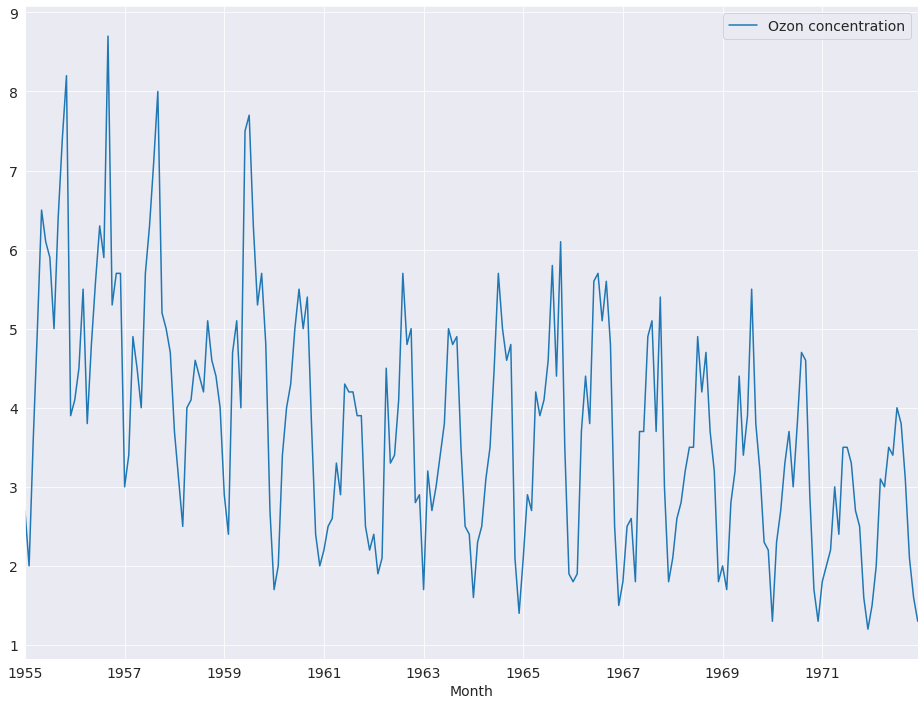

In [ ]:
df.plot()

In [ ]:
# Descomposición
result = seasonal_decompose(df['Ozon concentration'], model = 'Additive')

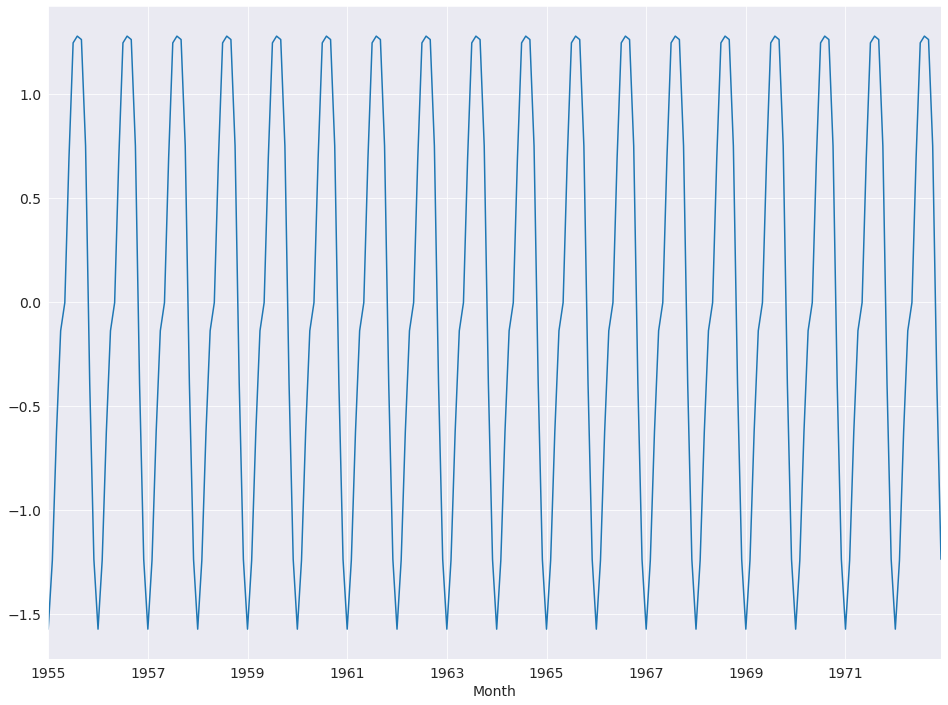

In [ ]:
result.seasonal.plot()

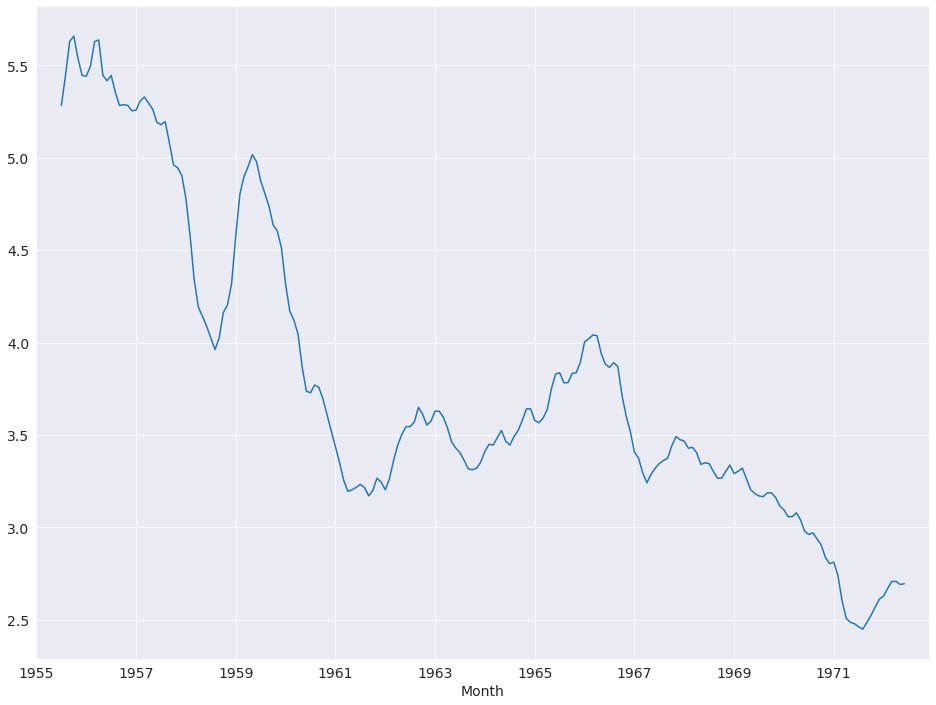

In [ ]:
result.trend.plot()

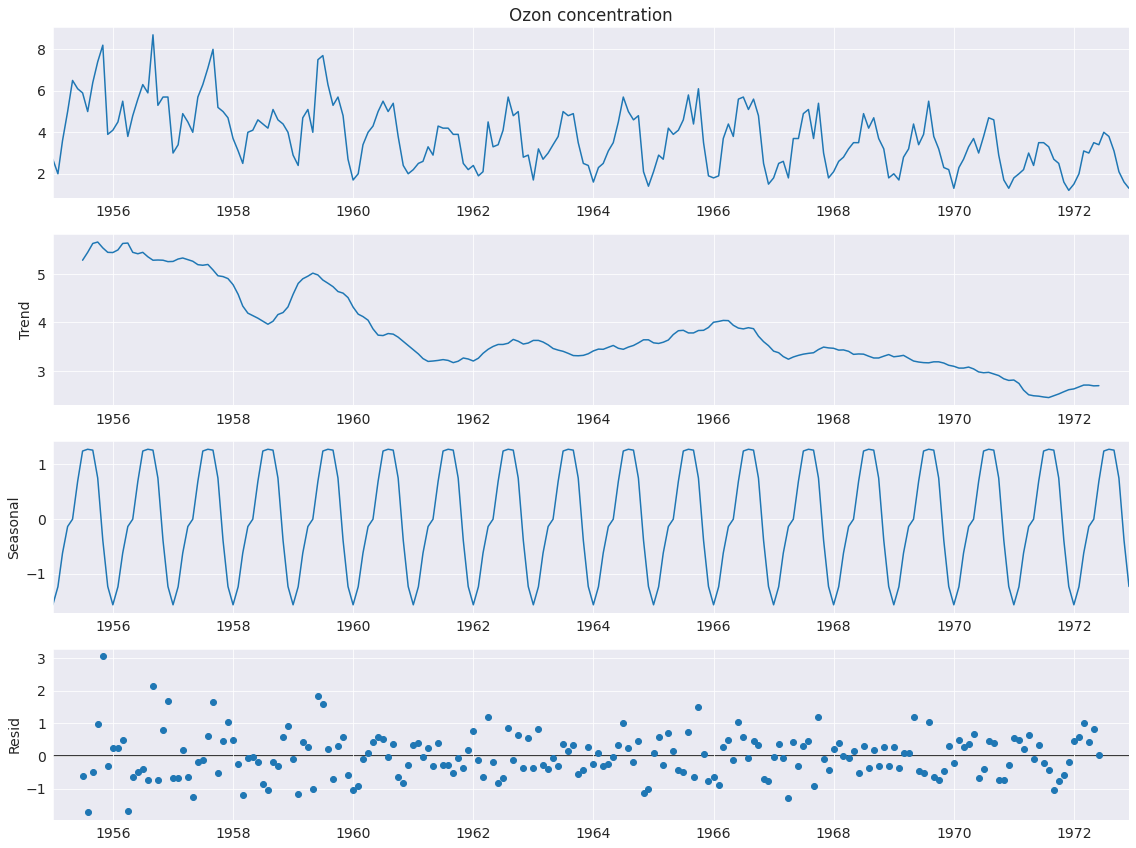

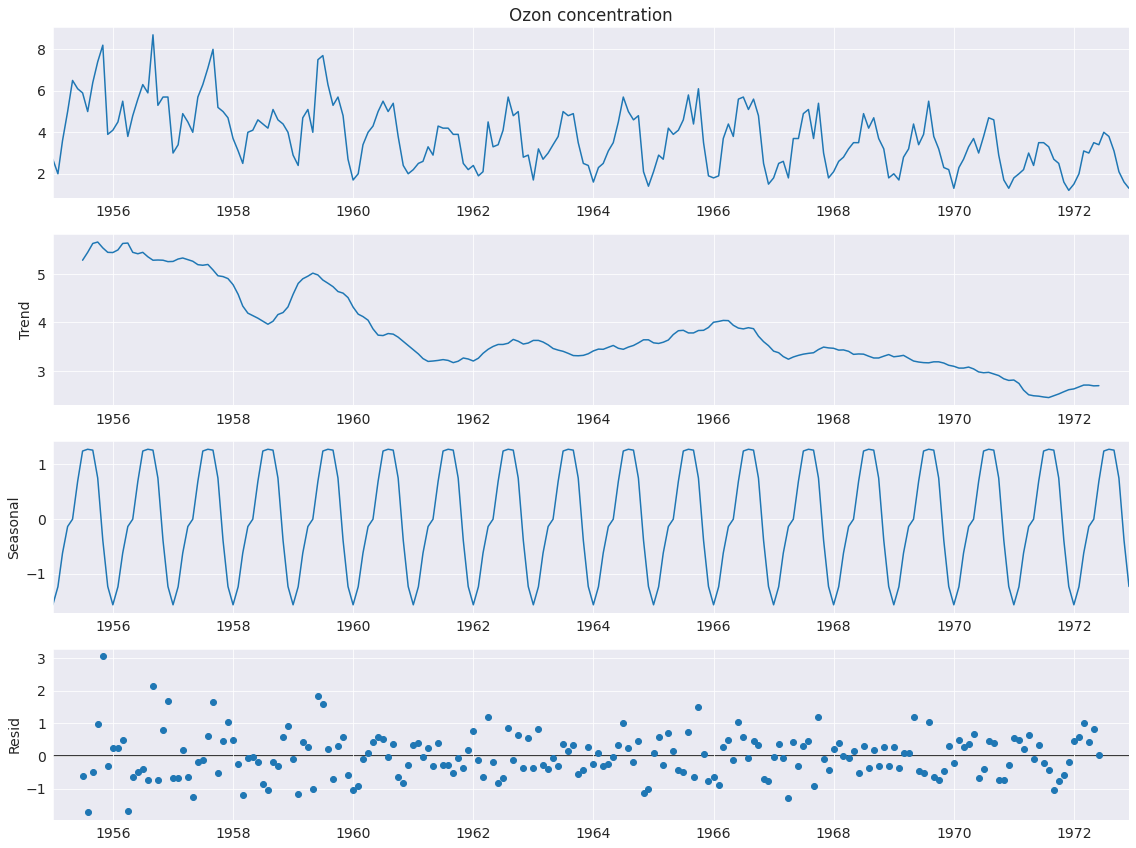

In [ ]:
result.plot()

## Descomposición de tendencia estacional usando LOESS (STL)

Haremos uso de STL para descomponer una serie de tiempo en tres componentes: **tendencia**, **estacional** y **residual**. 
STL utiliza LOESS (*suavizado de diagrama de dispersión estimado localmente*) para extraer estimaciones suavizadas 
de los tres componentes. Las entradas clave en STL son:

- season- La duración de la temporada más suave. Debe ser extraño.

- trend- La duración de la tendencia más suave, por lo general alrededor del 150% de *season*. Debe ser impar y más grande que *season*.

- low_pass- La longitud de la ventana de estimación de paso bajo, generalmente el número impar más pequeño mayor que la periodicidad de los datos.

Primero importamos los paquetes necesarios, preparamos el entorno de gráficos y preparamos los datos.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

In [ ]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

La descomposición requiere 1 entrada, la *serie de datos*. Si la serie de datos no tiene una frecuencia, 
también debe especificar **period**. El valor predeterminado para *season* es 7, por lo que también debe 
cambiarse en la mayoría de las aplicaciones.

In [ ]:
!pip install statsmodels==0.12.1


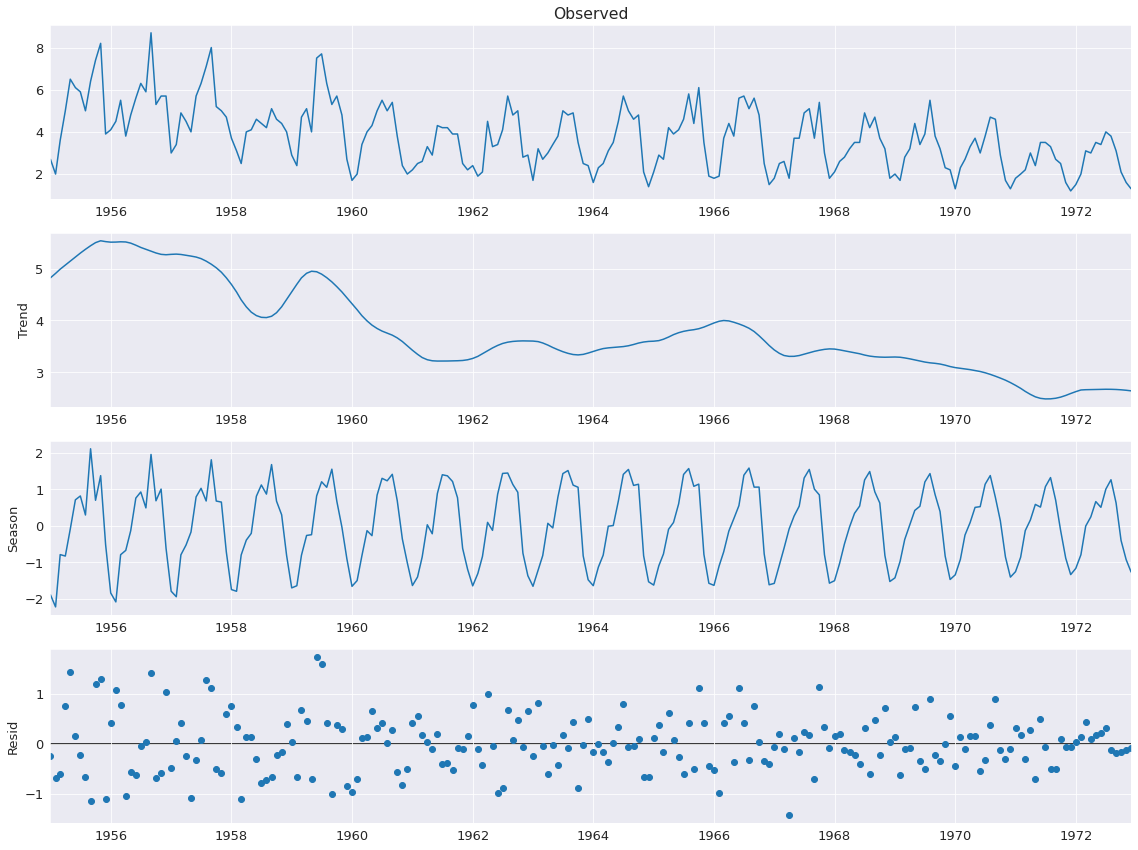

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(df, seasonal=13)
res = stl.fit()
fig = res.plot()

## Montaje robusto
La configuración **robust** utiliza una función de ponderación dependiente de los datos que vuelve a 
ponderar los datos al estimar el LOESS (y también se usa LOWESS). El uso de una estimación robusta permite que el 
modelo tolere errores más grandes que son visibles en el gráfico inferior.

- Aquí utilizamos una serie de medidas de la producción de equipos eléctricos en la UE.

In [ ]:
from statsmodels.datasets import elec_equip as ds
elec_equip = ds.load().data

A continuación, estimamos el modelo con y sin *ponderación robusta*. La diferencia es menor y 
es más pronunciada durante la crisis financiera de 2008. La estimación no robusta asigna pesos 
iguales a todas las observaciones y, por lo tanto, produce errores más pequeños, en promedio. 
Los pesos varían entre 0 y 1.

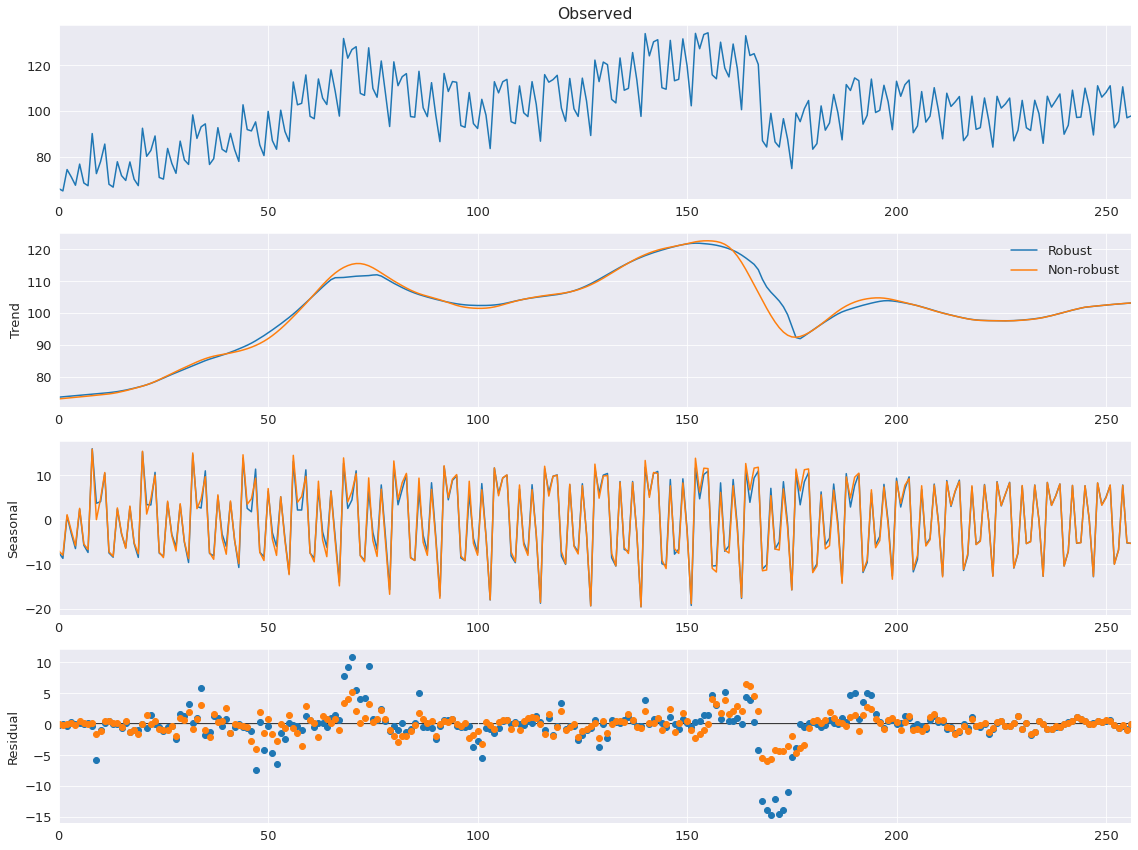

In [ ]:
def add_stl_plot(fig, res, legend):
    """Agregue 3 parcelas de un segundo ajuste STL"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)


stl = STL(elec_equip, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(elec_equip, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

## grado LOESS
La configuración predeterminada estima el modelo LOESS con una constante y una tendencia. Esto se puede cambiar 
para incluir solo una constante al establecerlo COMPONENT_deg en 0. Aquí el grado hace poca diferencia, excepto en 
la tendencia en torno a la crisis financiera de 2008.

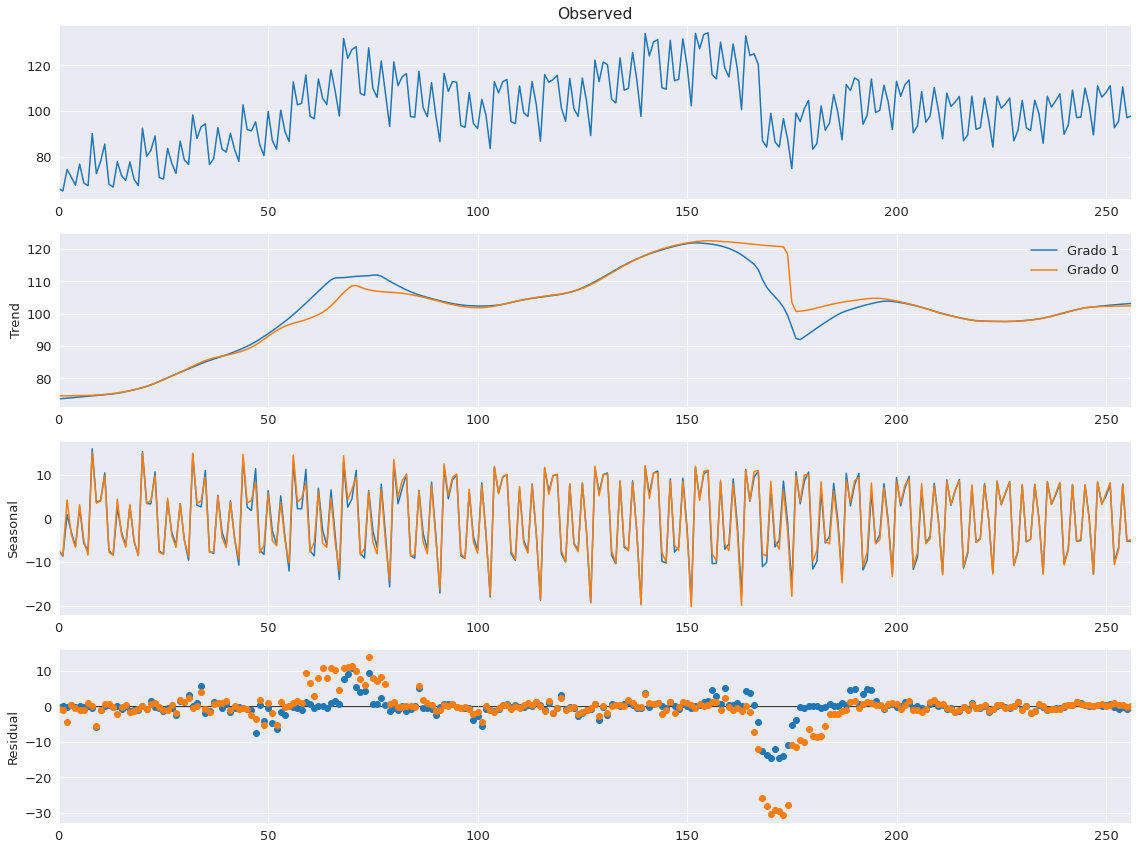

In [ ]:
stl = STL(elec_equip, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True)
res_deg_0 = stl.fit()
fig = res_robust.plot()
add_stl_plot(fig, res_deg_0, ["Grado 1", "Grado 0"])

## Actuación
Se pueden usar tres opciones para reducir el costo computacional de la descomposición STL:

- seasonal_jump

- trend_jump

- low_pass_jump

Cuando estos son distintos de cero, el LOESS para el componente COMPONENT solo se estima cada COMPONENT_jump observación, 
y se usa la interpolación lineal entre puntos. Estos valores normalmente no deberían ser más del 10-20% 
del tamaño de seasonal, trend o low_pass, respectivamente.

El siguiente ejemplo muestra cómo estos pueden reducir el costo computacional por un factor de 15 utilizando 
datos simulados con una tendencia cosinusoidal de baja frecuencia y un patrón estacional sinusoidal.

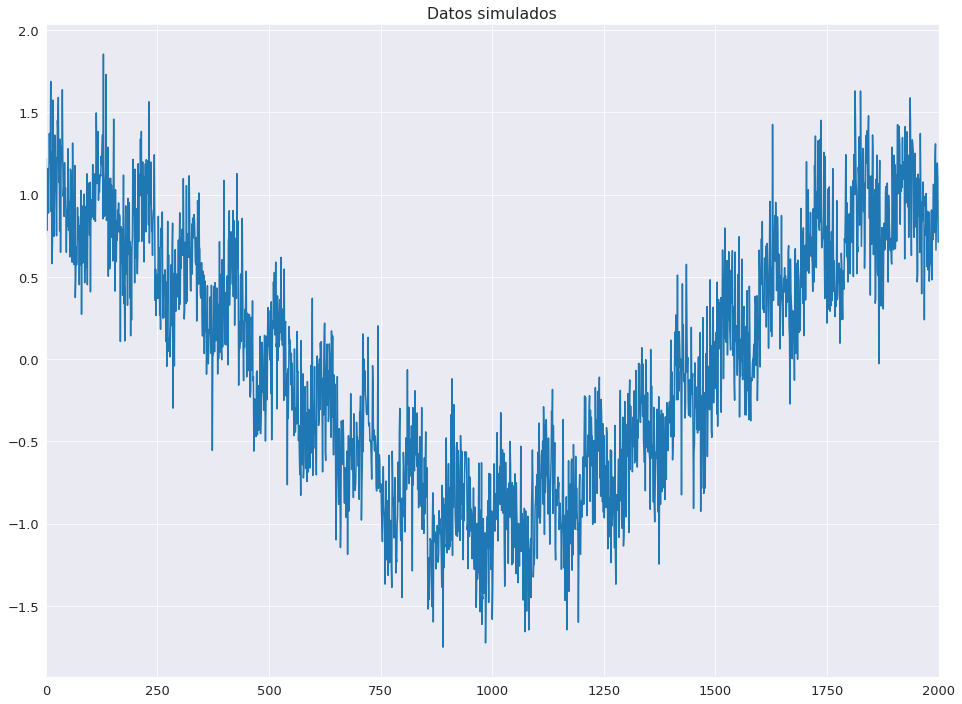

In [ ]:
import numpy as np

rs = np.random.RandomState(0xA4FD94BC)
tau = 2000
t = np.arange(tau)
period = int(0.05 * tau)
seasonal = period + ((period % 2) == 0)  # Ensure odd
e = 0.25 * rs.standard_normal(tau)
y = np.cos(t / tau * 2 * np.pi) + 0.25 * np.sin(t / period * 2 * np.pi) + e
plt.plot(y)
plt.title("Datos simulados")
xlim = plt.gca().set_xlim(0, tau)

Primero, el modelo de línea base se estima con todos los saltos iguales a 1.

1 loop, best of 5: 635 ms per loop


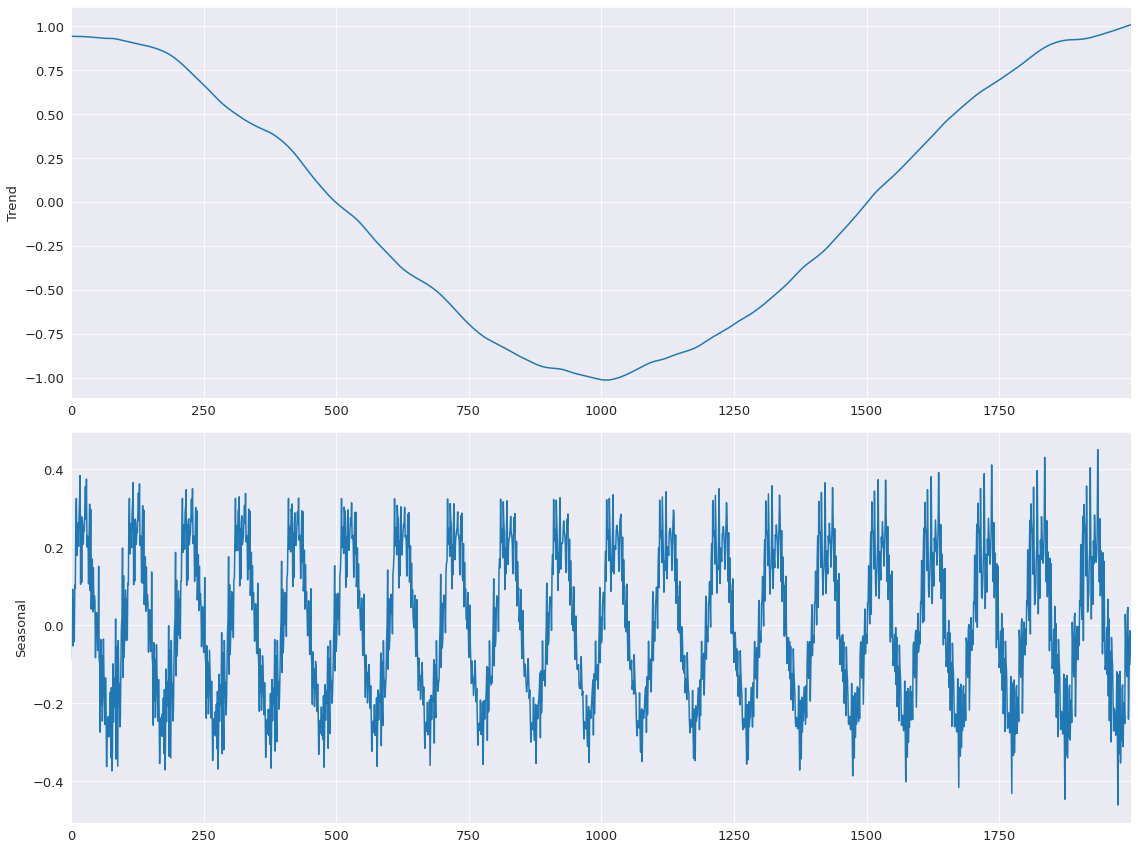

In [ ]:
mod = STL(y, period=period, seasonal=seasonal)
%timeit mod.fit()
res = mod.fit()
fig = res.plot(observed=False, resid=False)

Todos los saltos están configurados al 15% de la longitud de su ventana. La interpolación lineal limitada hace 
poca diferencia en el ajuste del modelo.

10 loops, best of 5: 58.2 ms per loop


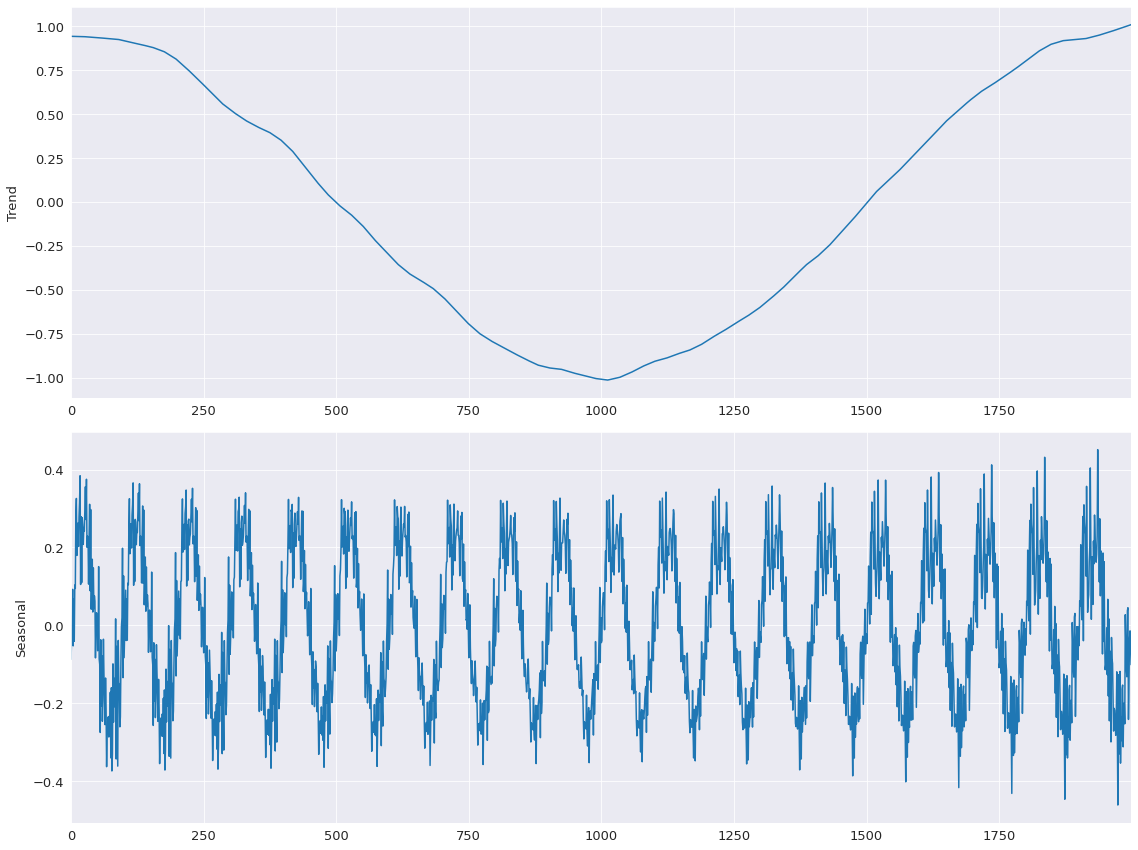

In [ ]:
low_pass_jump = seasonal_jump = int(0.15 * (period + 1))
trend_jump = int(0.15 * 1.5 * (period + 1))
mod = STL(
    y,
    period=period,
    seasonal=seasonal,
    seasonal_jump=seasonal_jump,
    trend_jump=trend_jump,
    low_pass_jump=low_pass_jump,
)
%timeit mod.fit()
res = mod.fit()
fig = res.plot(observed=False, resid=False)

## Información de los precios de las acciones de Apple Inc. (AAPL)

In [ ]:
# importando modulos necesarios
!pip install pandas-datareader==0.10.0

In [ ]:
# importando modulos necesarios
#!pip install pandas-datareader

import numpy as np
import pandas as pd
import datetime as dt
import statsmodels.api as sm 

# librerías de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt 


# graficos incrustados
%matplotlib inline

In [ ]:
# Creando una serie de tiempo de Acciones Apple Inc. desde yahoo finance
from pandas_datareader import data

wft = data.DataReader("AAPL", 'yahoo', '2016-1-1', '2016-9-30')
wft.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.220579
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.613628
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.151516
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.174419
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.291668


In [ ]:
# filtrando sólo del 2016-02-04 al 2016-02-18
wft['2016-02-04':'2016-02-18']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-04,24.332500,23.797501,23.965000,24.150000,185886800.0,22.329416
2016-02-05,24.230000,23.422501,24.129999,23.504999,185672400.0,21.733038
2016-02-08,23.924999,23.260000,23.282499,23.752501,216085600.0,21.961878
2016-02-09,23.985001,23.482500,23.572500,23.747499,177324800.0,21.957256
2016-02-10,24.087500,23.525000,23.980000,23.567499,169374400.0,21.790825
2016-02-11,23.680000,23.147499,23.447500,23.424999,200298800.0,21.659071
2016-02-12,23.625000,23.252501,23.547501,23.497499,161405600.0,21.726101
2016-02-16,24.212500,23.652500,23.754999,24.160000,196231600.0,22.338659
2016-02-17,24.552500,24.037500,24.167500,24.530001,179452800.0,22.680771


In [ ]:
# valores al 2016-02-16
wft.loc['2016-2-16']

High         2.421250e+01
Low          2.365250e+01
Open         2.375500e+01
Close        2.416000e+01
Volume       1.962316e+08
Adj Close    2.233866e+01
Name: 2016-02-16 00:00:00, dtype: float64

In [ ]:
# valor de la columna Adj Close al 2016-2-16
wft['Adj Close']['2016-2-16']

22.338659286499023

In [ ]:
# filtrando todo febrero de 2016
wft['2016-2']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-01,24.177500,23.850000,24.117500,24.107500,163774000.0,22.169819
2016-02-02,24.010000,23.570000,23.855000,23.620001,149428800.0,21.721498
2016-02-03,24.209999,23.520000,23.750000,24.087500,183857200.0,22.151426
2016-02-04,24.332500,23.797501,23.965000,24.150000,185886800.0,22.329416
2016-02-05,24.230000,23.422501,24.129999,23.504999,185672400.0,21.733038
2016-02-08,23.924999,23.260000,23.282499,23.752501,216085600.0,21.961878
2016-02-09,23.985001,23.482500,23.572500,23.747499,177324800.0,21.957256
2016-02-10,24.087500,23.525000,23.980000,23.567499,169374400.0,21.790825
2016-02-11,23.680000,23.147499,23.447500,23.424999,200298800.0,21.659071


In [ ]:
# Valores al cierre de cada mes.
wft.asfreq('M', method='ffill')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-31,24.334999,23.587500,23.697500,24.334999,257666000.0,22.379032
2016-02-29,24.557501,24.162500,24.215000,24.172501,140865200.0,22.350218
2016-03-31,27.475000,27.219999,27.430000,27.247499,103553600.0,25.193399
2016-04-30,23.680000,23.127501,23.497499,23.434999,274126000.0,21.668318
2016-05-31,25.100000,24.705000,24.900000,24.965000,169228800.0,23.223513
2016-06-30,23.942499,23.575001,23.610001,23.900000,143345600.0,22.232807
2016-07-31,26.137501,25.920000,26.047501,26.052500,110934800.0,24.235153
2016-08-31,26.642500,26.410000,26.415001,26.525000,118649600.0,24.808359
2016-09-30,28.342501,27.950001,28.115000,28.262501,145516400.0,26.433416


In [ ]:
# Valores al cierre de cada mes (días laborales).
wft.asfreq('BM')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-29,24.334999,23.587500,23.697500,24.334999,257666000.0,22.379032
2016-02-29,24.557501,24.162500,24.215000,24.172501,140865200.0,22.350218
2016-03-31,27.475000,27.219999,27.430000,27.247499,103553600.0,25.193399
2016-04-29,23.680000,23.127501,23.497499,23.434999,274126000.0,21.668318
2016-05-31,25.100000,24.705000,24.900000,24.965000,169228800.0,23.223513
2016-06-30,23.942499,23.575001,23.610001,23.900000,143345600.0,22.232807
2016-07-29,26.137501,25.920000,26.047501,26.052500,110934800.0,24.235153
2016-08-31,26.642500,26.410000,26.415001,26.525000,118649600.0,24.808359
2016-09-30,28.342501,27.950001,28.115000,28.262501,145516400.0,26.433416


In [ ]:
# valores al cierre de cada trimestre
wft.asfreq('BQ')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-31,27.475000,27.219999,27.430000,27.247499,103553600.0,25.193399
2016-06-30,23.942499,23.575001,23.610001,23.900000,143345600.0,22.232807
2016-09-30,28.342501,27.950001,28.115000,28.262501,145516400.0,26.433416


Una operación común en los datos de series de tiempo es desplazar los valores hacia 
atrás y adelante en el tiempo, como por ejemplo para calcular el cambio porcentual 
de una muestra a otra.

In [ ]:
# desplazando el 1 dia el valor de cierre
desplazado = wft['Adj Close'].shift(1)
desplazado[:5]

Date
2016-01-04          NaN
2016-01-05    24.220579
2016-01-06    23.613628
2016-01-07    23.151516
2016-01-08    22.174419
Name: Adj Close, dtype: float64

In [ ]:
# calculando el porcentaje de variación del día.
variacion_diaria = wft['Adj Close'] / wft['Adj Close'].shift(1) - 1
wft['var_diaria'] = variacion_diaria
wft['var_diaria'][:5]

Date
2016-01-04         NaN
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042204
2016-01-08    0.005288
Name: var_diaria, dtype: float64

In [ ]:
# mismo resultado utilizando pct_change()
wft['Adj Close'].pct_change()[:5]

Date
2016-01-04         NaN
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042204
2016-01-08    0.005288
Name: Adj Close, dtype: float64

In [ ]:
# calculando rendimiento acumulado diario
rendimiento_diario = (1 + wft['Adj Close'].pct_change()).cumprod()
wft['rend_diario'] = rendimiento_diario
wft['rend_diario'][:5]

Date
2016-01-04         NaN
2016-01-05    0.974941
2016-01-06    0.955861
2016-01-07    0.915520
2016-01-08    0.920361
Name: rend_diario, dtype: float64

Una operación fundamental para entender el comportamiento de una serie de tiempo y 
poder determinar si se trata de una serie estacionaria o no; es realizar gráficos 
de la misma.

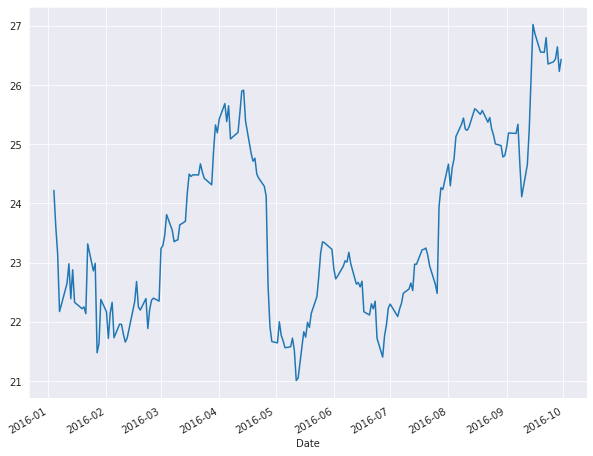

In [ ]:
# graficando Adj Close
plot = wft['Adj Close'].plot(figsize=(10, 8))

In [ ]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
wft_ciclo, wft_tend = sm.tsa.filters.hpfilter(wft['Adj Close'])
wft['tend'] = wft_tend

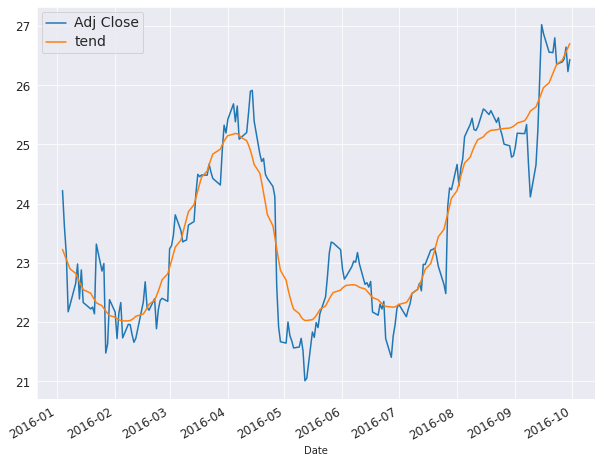

In [ ]:
# graficando la variacion del precio real con la tendencia.
wft[['Adj Close', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

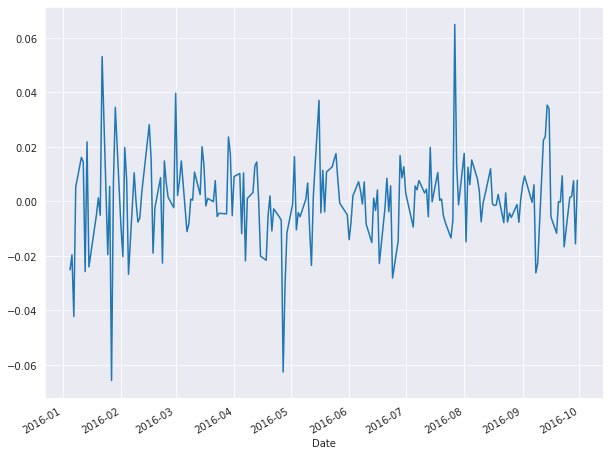

In [ ]:
# graficando rendimiento diario
plot = wft['var_diaria'].plot(figsize=(10, 8))

## EJERCICIO
Descomponer la serie de tiempo ('Adj Close') en su tendencia, su estacionalidad y sus factores residuales.

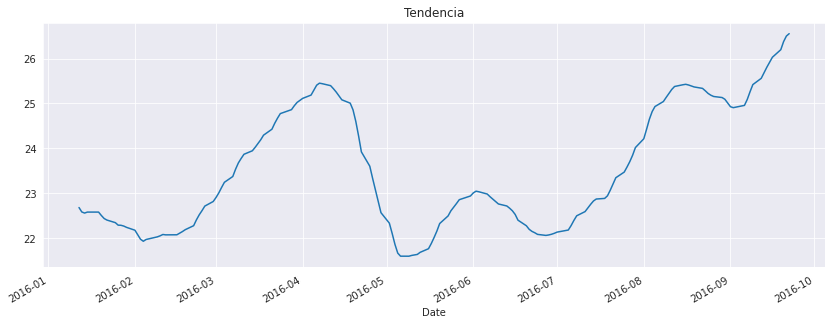

In [ ]:
result = seasonal_decompose(wft['Adj Close'], 
                            model = 'Additive', period=12)

plt.figure(figsize=(14,5))
result.trend.plot()
plt.title('Tendencia')
plt.show()

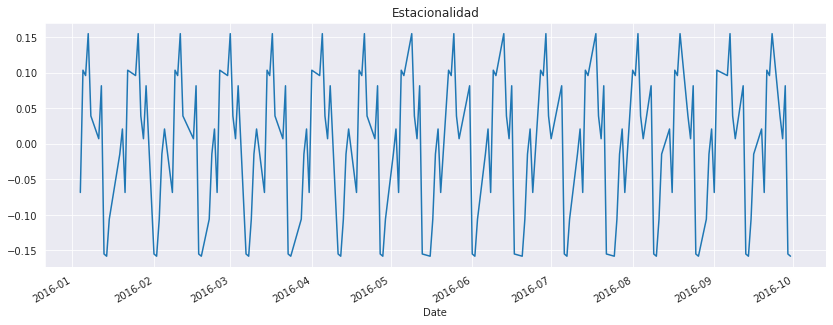

In [ ]:
plt.figure(figsize=(14,5))
result.seasonal.plot()
plt.title('Estacionalidad')
plt.show()

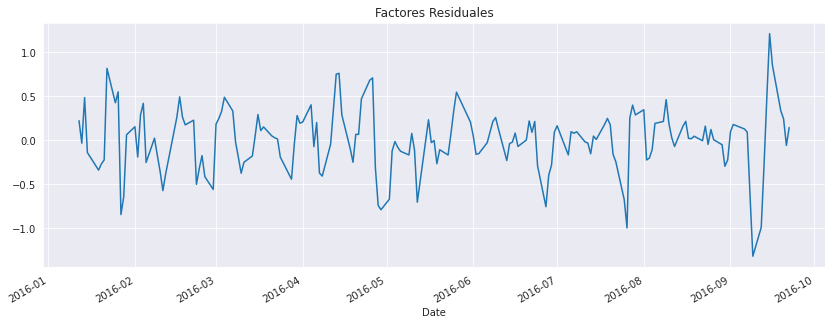

In [ ]:
plt.figure(figsize=(14,5))

result.resid.plot()
plt.title('Factores Residuales')
plt.show()

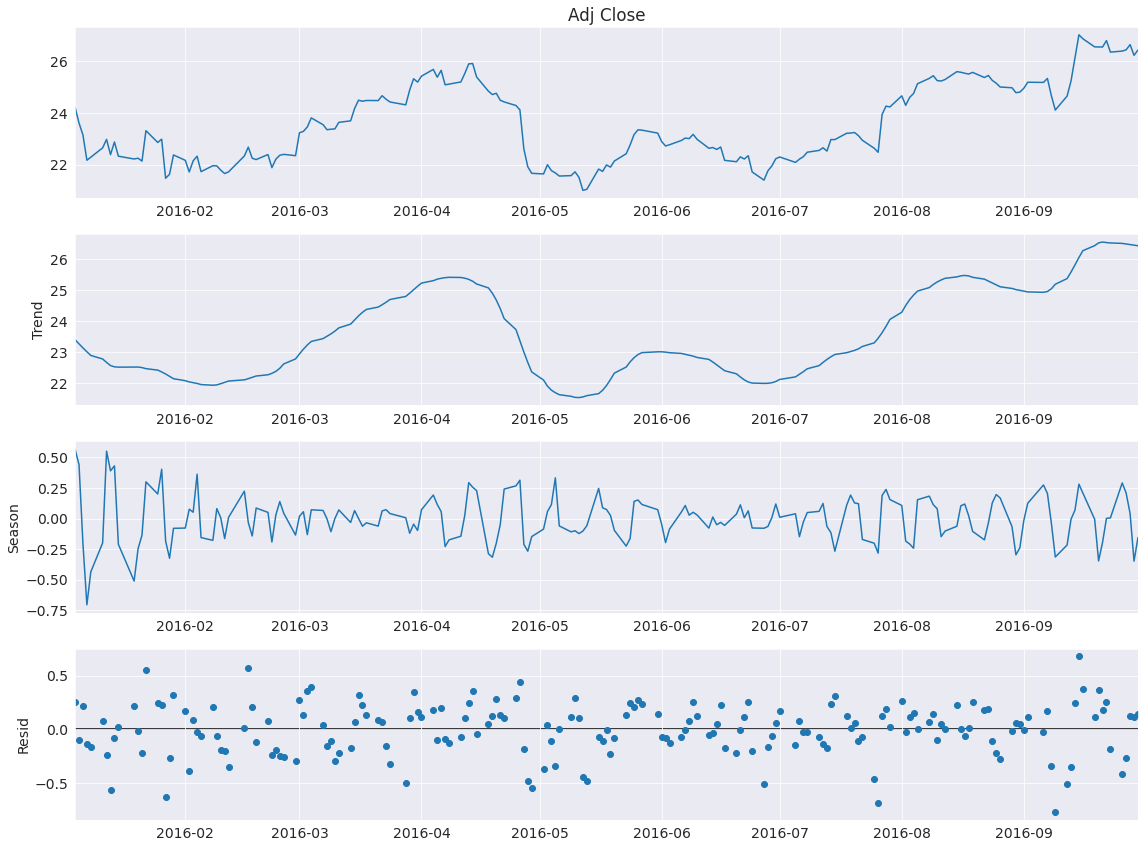

In [ ]:
# Modelo LOESS
import statsmodels
from statsmodels.tsa.seasonal import STL
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=14)

stl = STL(wft['Adj Close'], period=7)
res = stl.fit()
fig = res.plot()